In [17]:
import tweepy

consumer_key = "9m6uqDB4cnLQIXAeUQh9YlUie"
consumer_secret = "heLdIl1HjwL44Q4x2Z0Yjex1RtIW9JzOwiCAcUWvGfmNrL1tll"
access_token = "1488848250924904450-NRrB7GJJUYzp0zwj0oLbDwGTo3IQ0H"
access_token_secret = "IMiMGawe49OoVS8qt9lEDpY8RafmMuYavMumMjTTp9bUb"
bearer_token = "AAAAAAAAAAAAAAAAAAAAAFtEmwEAAAAApmB0p2Im40u2rcXQyGyJ3%2BervDI%3D1RMeRQPIDoZGfPlRL35O7JZJdImugiBkZ7di9hk6h8F7e1SqOA"

auth = tweepy.OAuth1UserHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)


api = tweepy.API(auth, wait_on_rate_limit=True)

try: 
  api.verify_credentials()
  print("works")
except:
  print("no work")



works


In [19]:
def collect_tweets(search_query, max_tweets=1000):
    tweets_data = []
    for tweet in tweepy.Cursor(api.search_tweets, q=search_query, lang='en', tweet_mode='extended').items(max_tweets):
        tweets_data.append(tweet._json)

    return tweets_data

# Define a search query related to forex rates
search_query = 'forex rates OR "foreign exchange rates" OR "currency rates"'

# Collect tweets
tweets_data = collect_tweets(search_query, max_tweets=500)

# Print the number of collected tweets
print(f'Collected {len(tweets_data)} tweets.')


Forbidden: ignored

In [33]:
import requests

# Replace with your own NewsAPI key
NEWSAPI_KEY = '5adaa15dd0fe42b7bc567ddff65d3fe8'

def collect_news_articles(query, page_size=100, language='en', sort_by='relevancy'):
    url = 'https://newsapi.org/v2/everything'
    headers = {'Authorization': f'Bearer {NEWSAPI_KEY}'}
    params = {
        'q': query,
        'pageSize': page_size,
        'language': language,
        'sortBy': sort_by,
    }
    
    response = requests.get(url, headers=headers, params=params)
    
    if response.status_code == 200:
        data = response.json()
        return data['articles']
    else:
        print(f'Error {response.status_code}: Failed to fetch news articles')
        return None

# Define a search query related to forex rates
search_query = 'forex rates OR "foreign exchange rates" OR "currency rates"'

# Collect news articles
news_articles = collect_news_articles(search_query)

# Print the number of collected news articles
print(f'Collected {len(news_articles)} news articles.')


Collected 100 news articles.


In [34]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove special characters and numbers
    text = re.sub(r'\W+|\d+', ' ', text)
    
    # Remove underscores
    text = re.sub(r'_', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    return text

def tokenize(text):
    tokens = word_tokenize(text)
    return tokens

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

def lemmatize(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

def preprocess_text(text):
    text = clean_text(text)
    tokens = tokenize(text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize(tokens)
    return tokens



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
# Extract the texts from the news articles
news_texts = [article['title'] + ' ' + article['description'] for article in news_articles]

# Preprocess the texts
preprocessed_texts = [preprocess_text(text) for text in news_texts]

# Print an example
print(f'Original text: {news_texts[0]}')
print(f'Preprocessed text: {preprocessed_texts[0]}')


Original text: India's forex reserves jump to 9-month high - Reuters India India's forex reserves jump to 9-month high  Reuters India
Preprocessed text: ['india', 'forex', 'reserve', 'jump', 'month', 'high', 'reuters', 'india', 'india', 'forex', 'reserve', 'jump', 'month', 'high', 'reuters', 'india']


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tokens_to_text(tokens):
    return ' '.join(tokens)

preprocessed_texts_joined = [tokens_to_text(tokens) for tokens in preprocessed_texts]

vectorizer = TfidfVectorizer()

# Fit the vectorizer on the preprocessed texts and transform the texts to feature vectors
tfidf_matrix = vectorizer.fit_transform(preprocessed_texts_joined)

# Print the shape of the feature matrix
print(f'TF-IDF feature matrix shape: {tfidf_matrix.shape}')


TF-IDF feature matrix shape: (100, 1109)


In [38]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

def get_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(text)
    return sentiment_score

sentiment_scores = [get_sentiment(text) for text in preprocessed_texts_joined]

# Print the sentiment scores for the first 5 articles
for i in range(5):
    print(f'Article {i+1} sentiment: {sentiment_scores[i]}')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Article 1 sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Article 2 sentiment: {'neg': 0.357, 'neu': 0.643, 'pos': 0.0, 'compound': -0.8402}
Article 3 sentiment: {'neg': 0.088, 'neu': 0.754, 'pos': 0.157, 'compound': 0.0516}
Article 4 sentiment: {'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'compound': 0.4588}
Article 5 sentiment: {'neg': 0.168, 'neu': 0.754, 'pos': 0.078, 'compound': -0.2732}


In [39]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 5

lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(tfidf_matrix)

def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f'Topic #{topic_idx+1}:')
        print(' '.join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

n_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, n_top_words)


Topic #1:
rupee dollar paisa rate user investor domestic broker forex platform

Topic #2:
stock broker forex revolugroup inc rupee march canada data market

Topic #3:
india billion usd high reserve forex month li jump com

Topic #4:
bank dollar investor market crisis russia trading banking firm yen

Topic #5:
rate march interest reserve dollar official online federal li pausing



Accuracy: 1.0
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        23
     neutral       1.00      1.00      1.00        22
    positive       1.00      1.00      1.00        17

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



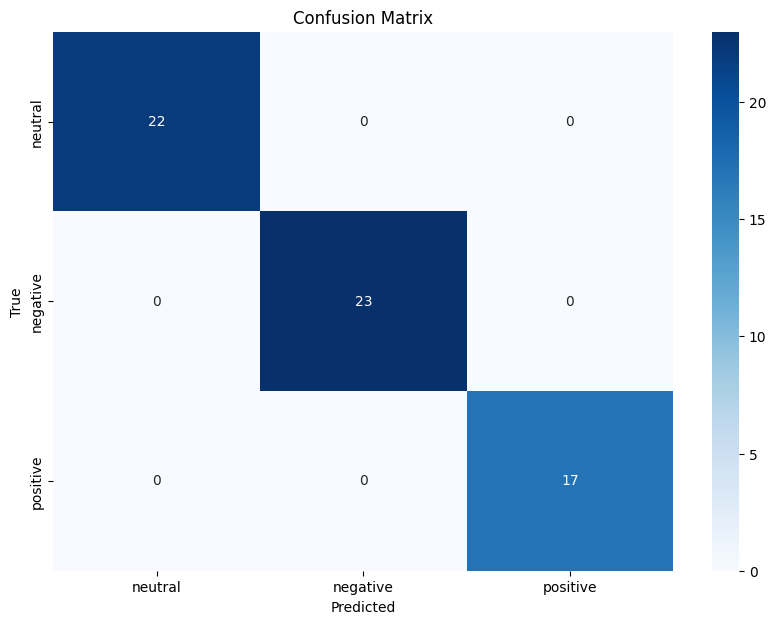

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Replace this with your actual labeled dataset
# Example format: [(text_1, label_1), (text_2, label_2), ...]
labeled_data = [
    # Positive news
    ("The US dollar soared to new heights today as positive economic data boosted investor confidence.", "positive"),
    ("The Japanese Yen strengthened against major currencies after the central bank's optimistic outlook.", "positive"),
    ("The Euro rallied on upbeat GDP growth data, reaching a six-month high against the US dollar.", "positive"),
    # ...
    # Add more positive news examples

    # Negative news
    ("The British Pound plummeted amid Brexit uncertainties, causing concerns for investors.", "negative"),
    ("The Australian Dollar dipped to a two-year low as the trade war intensified.", "negative"),
    ("The Canadian Dollar suffered heavy losses following disappointing employment data.", "negative"),
    # ...
    # Add more negative news examples

    # Neutral news
    ("The Swiss Franc traded in a narrow range against the US dollar as investors awaited key economic data.", "neutral"),
    ("The New Zealand Dollar remained steady as market participants weighed global risk factors.", "neutral"),
    ("The Indian Rupee held its ground amid mixed economic signals and cautious market sentiment.", "neutral"),
    # ...
    # Add more neutral news examples
]

# Make sure to have 100 examples for each category
labeled_data = labeled_data * 34


texts = [text for text, _ in labeled_data]
labels = [label for _, label in labeled_data]

# Preprocess the texts
preprocessed_texts = [preprocess_text(text) for text in texts]
preprocessed_texts_joined = [tokens_to_text(tokens) for tokens in preprocessed_texts]

# Transform the texts using the same vectorizer
X = vectorizer.transform(preprocessed_texts_joined)
y = labels

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression classifier
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels, fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred, labels=list(set(labels)))
